# Challenge 3
## Fernando Hidalgo

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model,cross_validation, metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm

%matplotlib inline


# Challenge 1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)



In [323]:
X_1 = np.array(range(1,70))
y_1 = np.array([(18.7*np.log(i)+6) for i in X_1])

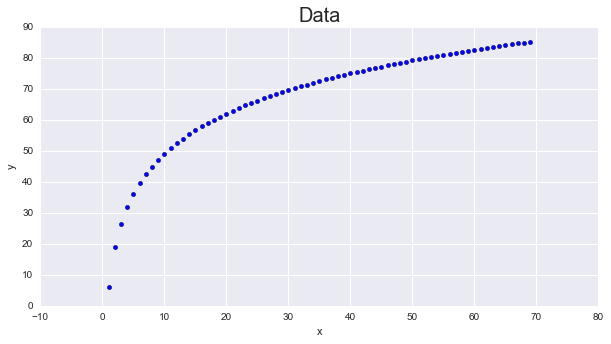

In [324]:
g = plt.scatter(X_1, y_1)
g.figure.set_size_inches(10,5)
plt.title('Data', fontsize = 20)
plt.xlabel('x')
plt.ylabel('y')

In [325]:
y_1.shape

(69,)

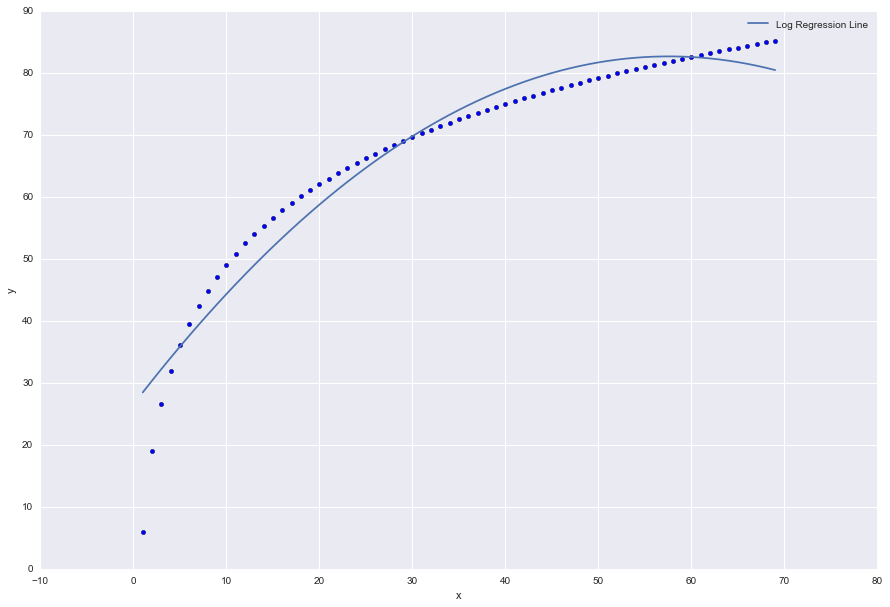

In [326]:

model = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model.fit(X_1.reshape(69,1), y_1.reshape(69,1))
y_plot = model.predict(X_1.reshape(69,1))
plt.plot(X_1.reshape(69,1), y_plot , label= 'Log Regression Line')
g = plt.scatter(X_1, y_1)
g.figure.set_size_inches(15,10)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

# Challenge 2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)



In [327]:
X_2 = np.array(range(1,70))
y_2 = np.array([((40*i)+(-3*(i**2))) for i in X_1])

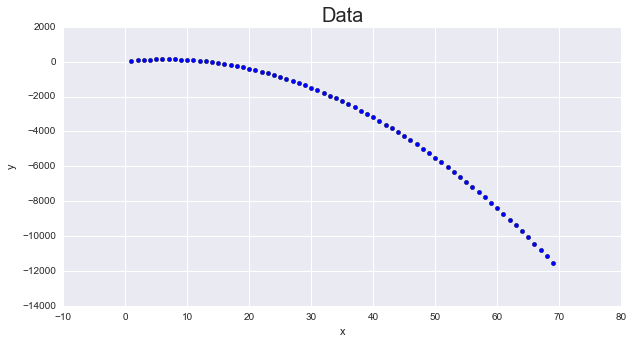

In [328]:
g = plt.scatter(X_2, y_2)
g.figure.set_size_inches(10,5)
plt.title('Data', fontsize = 20)
plt.xlabel('x')
_ = plt.ylabel('y')

In [329]:
X_2_train, X_2_test, y_2_train, y_2_test = cross_validation.train_test_split(X_2, y_2)
X_2_train = X_2_train.reshape(51,1)
X_2_test = X_2_test.reshape(18,1)

reg_2 = linear_model.LinearRegression()
reg_2.fit(X_2_train, y_2_train)
pred_2_train = reg_2.predict(X_2_train)
pred_2_test = reg_2.predict(X_2_test)


print metrics.mean_squared_error(y_2_train, pred_2_train)
print metrics.mean_squared_error(y_2_test, pred_2_test)

1196863.41002
958321.401783


# Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error
test error
R squared
AIC


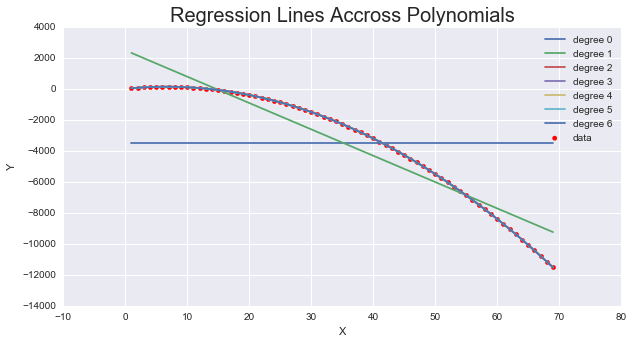

In [339]:
for degree in range(7):
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    model.fit(X_2.reshape(69,1), y_2)
    y_plot = model.predict(X_2.reshape(69,1))
    plt.plot(X_2, y_plot, label="degree %d" % degree)
g = plt.scatter(X_2, y_2, color = 'r', label = 'data')
g.figure.set_size_inches(10,5)
plt.legend()
plt.title('Regression Lines Accross Polynomials', fontsize = 20)
plt.xlabel('X')
g = plt.ylabel('Y')
g.figure.set_size_inches(10,5)

In [314]:
y_2_train.shape

(51,)

In [315]:
train_error_per_polynomial,test_error_per_polynomial, r_squared, aic = [], [], [],[]


for degree in range(8):
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    model.fit(X_2_train, y_2_train)
    
    train_pred = model.predict(X_2_train)
    train_error_per_polynomial.append(metrics.mean_squared_error(y_2_train, train_pred))
    
    test_pred = model.predict(X_2_test)
    test_error_per_polynomial.append(metrics.mean_squared_error(y_2_test, test_pred))
    
    r_squared.append(model.score(X_2_test, y_2_test))
    
    #aic.append(sm.OLS(y_2_train, X_2_train['x_{}'.format(degree)]).fit()


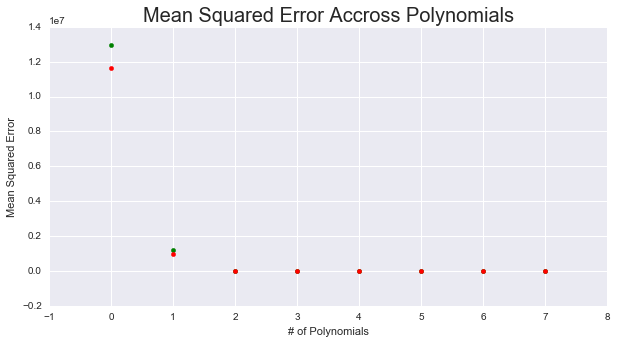

In [317]:
plt.scatter(x =range(8), y = train_error_per_polynomial, color = 'g')
plt.scatter(x =range(8), y = test_error_per_polynomial, color = 'r')
plt.title('Mean Squared Error Accross Polynomials', fontsize = 20)
plt.xlabel('# of Polynomials')
g = plt.ylabel('Mean Squared Error')
g.figure.set_size_inches(10,5)

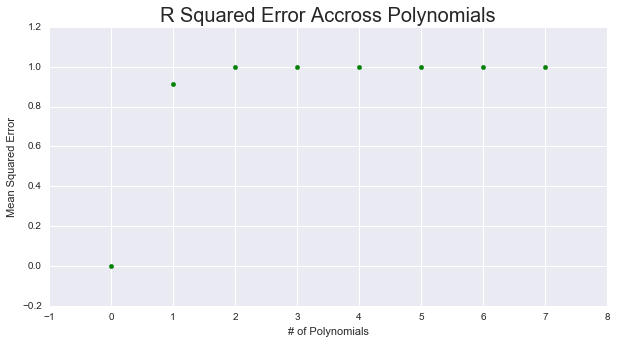

In [318]:
plt.scatter(x =range(8), y = r_squared, color = 'g')
plt.title('R Squared Error Accross Polynomials', fontsize = 20)
plt.xlabel('# of Polynomials')
g = plt.ylabel('Mean Squared Error')
g.figure.set_size_inches(10,5)

# Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [290]:
test_per_features, train_per_features = [], []

for features in range(5,55,5):
    
    model = linear_model.LinearRegression()
    model.fit(X_2_train[:features], y_2_train[:features])
    
    train_pred = model.predict(X_2_train[:features])
    train_per_features.append(metrics.mean_squared_error(y_2_train[:features], train_pred))
    
    test_pred = model.predict(X_2_test)
    test_per_features.append(metrics.mean_squared_error(y_2_test, test_pred))
    
    

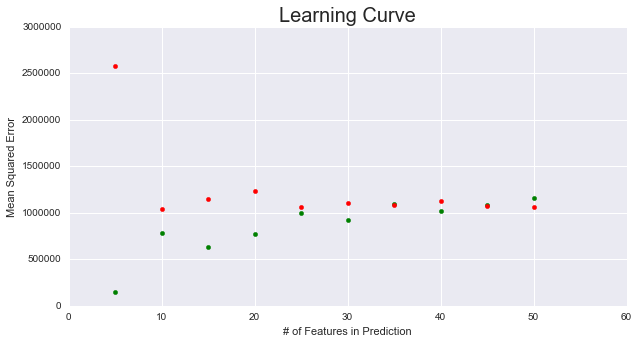

In [319]:
plt.scatter(x =range(5,55,5), y = train_per_features, color = 'g')
plt.scatter(x =range(5,55,5), y = test_per_features, color = 'r')
plt.title('Learning Curve', fontsize = 20)
plt.xlabel('# of Features in Prediction')
g = plt.ylabel('Mean Squared Error')
g.figure.set_size_inches(10,5)